<a href="https://colab.research.google.com/github/ysooch0819/AI16-Projects/blob/main/Section2_project_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import time
import json
from pandas import json_normalize

In [1105]:
import sys

if "google.colab" in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 718 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 22.7 MB/s 
     |████████████████████████████████| 133 kB 56.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=ce7a6fef243263ffa4542336180b15fc5a6c64863e0db20d584a245953f09454
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 r

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193.6 MB 59 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [817]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import re

In [20]:
# api_key = getAPIkey()
api_key = 'RGAPI-146f9057-11fb-4c6c-9d7f-52950a989078'

In [ ]:


REGION_SET= 'kr'
tier = 'challenger'
request_headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com"
}
url= 'https://kr.api.riotgames.com/tft/league/v1/challenger?api_key=' + api_key

req = requests.get(url)

In [ ]:
len(req.json()['entries'])

300

In [ ]:
challenger_sample = pd.DataFrame(req.json()).reset_index()
challenger_sample.to_csv('sample.csv', index=False, encoding='cp949')

In [ ]:
challenger_sample = pd.read_csv('sample.csv', encoding='cp949').set_index('index')
challenger_sample

,tier,leagueId,queue,name,entries
index,,,,,
0,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'Wq6S0VXK-5RxqhCIoj43jaY7yap4wl...
1,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'kRsaMVAuKMJ98pVtiiHuIliwEpJiGq...
2,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'LZYr5TN16DmatrYfG5nHRx7xjLLD-8...
3,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'EevAodEB1ogihddloTtNQmr237TbPY...
4,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'oarzOITC6LUddm097p5zMhpXFT2zeR...
...,...,...,...,...,...
295,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'alMRPqSjnkp4OII6-ZBbCdqdt3jXuh...
296,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'UiV0CKlJ-tHX7LVwQ2Z95nxdox8OMn...
297,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'cSXx2KKA1LyGEDbS1Od8GH_Zwoduvf...


In [ ]:
challenger_entries = pd.DataFrame(dict(challenger_sample['entries'])).T
challenger_entries

ValueError: ignored

In [ ]:
challenger_sample = pd.concat([challenger_sample, challenger_entries], axis=1)

In [ ]:
challenger_sample.head()

,index,tier,leagueId,queue,name,entries,summonerId,summonerName,leaguePoints,rank,wins,losses,veteran,inactive,freshBlood,hotStreak
0,0,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'Wq6S0VXK-5RxqhCIoj43jaY7yap4wl...,Wq6S0VXK-5RxqhCIoj43jaY7yap4wlOluyY2OKT35Gzvng,관자빵,1026,I,202,170,False,False,False,True
1,1,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'kRsaMVAuKMJ98pVtiiHuIliwEpJiGq...,kRsaMVAuKMJ98pVtiiHuIliwEpJiGqSDRVhfrS50TdPkwt...,Inv Artist,1338,I,428,273,True,False,False,True
2,2,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'LZYr5TN16DmatrYfG5nHRx7xjLLD-8...,LZYr5TN16DmatrYfG5nHRx7xjLLD-8dmSTvgdb5Uk-88CcY,fanny1,1088,I,377,340,False,False,True,True
3,3,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'EevAodEB1ogihddloTtNQmr237TbPY...,EevAodEB1ogihddloTtNQmr237TbPYwIGPedgVJ4qum96X...,엠 돈,1055,I,299,260,False,False,False,False
4,4,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'oarzOITC6LUddm097p5zMhpXFT2zeR...,oarzOITC6LUddm097p5zMhpXFT2zeRSX4ZHJ77mv1zcfor0,철회랜드,1025,I,196,158,False,False,True,True


In [ ]:
challenger_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         300 non-null    int64 
 1   tier          300 non-null    object
 2   leagueId      300 non-null    object
 3   queue         300 non-null    object
 4   name          300 non-null    object
 5   entries       300 non-null    object
 6   summonerId    300 non-null    object
 7   summonerName  300 non-null    object
 8   leaguePoints  300 non-null    object
 9   rank          300 non-null    object
 10  wins          300 non-null    object
 11  losses        300 non-null    object
 12  veteran       300 non-null    object
 13  inactive      300 non-null    object
 14  freshBlood    300 non-null    object
 15  hotStreak     300 non-null    object
dtypes: int64(1), object(15)
memory usage: 37.6+ KB


In [ ]:
df = challenger_sample.copy()

In [ ]:
df

,tier,leagueId,queue,name,entries
index,,,,,
0,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'Wq6S0VXK-5RxqhCIoj43jaY7yap4wl...
1,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'kRsaMVAuKMJ98pVtiiHuIliwEpJiGq...
2,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'LZYr5TN16DmatrYfG5nHRx7xjLLD-8...
3,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'EevAodEB1ogihddloTtNQmr237TbPY...
4,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'oarzOITC6LUddm097p5zMhpXFT2zeR...
...,...,...,...,...,...
295,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'alMRPqSjnkp4OII6-ZBbCdqdt3jXuh...
296,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'UiV0CKlJ-tHX7LVwQ2Z95nxdox8OMn...
297,CHALLENGER,946274f2-16b6-376e-8d60-e07ef8f06a7f,RANKED_TFT,Orianna's Dragons,{'summonerId': 'cSXx2KKA1LyGEDbS1Od8GH_Zwoduvf...


In [ ]:
# 필요없는 컬럼 제거: 'index', 'leagueId', 'queue', 'name', 'eentries', 'rank'
drop_cols = ['index', 'leagueId', 'queue', 'name', 'entries', 'rank']
df = df.drop(drop_cols, axis=1, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tier          300 non-null    object
 1   entries       300 non-null    object
 2   summonerId    300 non-null    object
 3   summonerName  300 non-null    object
 4   leaguePoints  300 non-null    object
 5   wins          300 non-null    object
 6   losses        300 non-null    object
 7   veteran       300 non-null    object
 8   inactive      300 non-null    object
 9   freshBlood    300 non-null    object
 10  hotStreak     300 non-null    object
dtypes: object(11)
memory usage: 25.9+ KB


In [ ]:
df.to_csv('sample_user.csv', index=False, encoding='cp949')

In [ ]:
## entries 딕셔너리에 들어있던 특성들 설명
# veteran : 현재 리그에서 최소 100게임 이상 플레이한 플레이어
# inactive : 휴면계정
# freshBlood : 최근에 리그에 합류한 새내기
# hotStreak : 연승 중인 플레이어

In [ ]:
df.summonerName.nunique()

300

In [ ]:
match_id = pd.DataFrame()

for i in range(0, len(df)-1):
    url_puuid = 'https://kr.api.riotgames.com/tft/summoner/v1/summoners/by-name/'\
                +df.summonerName[i]+'?api_key=' + api_key
    url_match = 'https://asia.api.riotgames.com/tft/match/v1/matches/by-puuid/'\
                +requests.get(url_puuid).json()['puuid']+'/ids?start=0&count=200&api_key=' +api_key
    req_match = requests.get(url_match)
    match_id.append(req_match.json())


KeyError: ignored

In [ ]:
match_id = pd.DataFrame()

In [ ]:
for i in range(284, len(df)-1):
    url_puuid = 'https://kr.api.riotgames.com/tft/summoner/v1/summoners/by-name/'\
                  +df.summonerName[i]+'?api_key=' + api_key
    url_match = 'https://asia.api.riotgames.com/tft/match/v1/matches/by-puuid/'\
                  +requests.get(url_puuid).json()['puuid']+'/ids?start=0&count=200&api_key=' +api_key
    req_match = requests.get(url_match)
    match_id = match_id.append(req_match.json())

In [ ]:
print('match_id 개수: ', len(match_id))
match_id

match_id 개수:  59598


,0
0,KR_6233363333
1,KR_6233290882
2,KR_6232501927
3,KR_6232409409
4,KR_6232324593
...,...
195,KR_6082653943
196,KR_6082591610
197,KR_6082557590
198,KR_6082406064


In [ ]:
match_id = match_id.drop_duplicates()

In [ ]:
len(match_id)
match_id.rename(columns = {0: 'match_id'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
match_id.to_csv('match_ID.csv', index=False, encoding='cp949')

In [21]:
match_id = pd.read_csv('match_ID.csv', encoding='cp949')
match_id

,match_id
0,KR_6233363333
1,KR_6233290882
2,KR_6232501927
3,KR_6232409409
4,KR_6232324593
...,...
34773,KR_6082653943
34774,KR_6082591610
34775,KR_6082557590
34776,KR_6082406064


In [22]:
match_id # 34778 개의 중복되지 않은 챌린저티어 매치

,match_id
0,KR_6233363333
1,KR_6233290882
2,KR_6232501927
3,KR_6232409409
4,KR_6232324593
...,...
34773,KR_6082653943
34774,KR_6082591610
34775,KR_6082557590
34776,KR_6082406064


In [23]:
df = match_id.copy()

In [24]:
df.iloc[0]['match_id']

'KR_6233363333'

In [25]:
len(df)

34778

In [75]:
import csv
f = open('rawdata.csv', encoding='cp949')
reader = csv.reader(f)
csv_list = []
for l in reader:
    csv_list.append(l)
f.close()
metadf = pd.DataFrame(csv_list)
metadf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,augments,companion,gold_left,last_round,level,placement,players_eliminated,puuid,time_eliminated,total_damage_to_players,traits,units,partner_group_id
1,"['TFT6_Augment_JeweledLotus', 'TFT7_Augment_Pa...",{'content_ID': 'c4abff3d-3a21-48c4-940d-ad54b3...,50,38,8,2,2,gihX7aaLSt3urJK1lTv3p87hA4aLaNhqwr030xceD9-pn1...,2311.57251,183,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Vladimir', 'itemNames'...",
2,"['TFT6_Augment_TradeSector', 'TFT6_Augment_Fir...",{'content_ID': '6054d70b-e401-4bec-b350-f26865...,3,27,8,7,0,EDzYOAvlgpa2Mx5utJGl-7rMEysGqpEV1C82lO-QsiUXOd...,1690.70752,38,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",
3,"['TFT6_Augment_TomeOfTraits1', 'TFT7_Augment_P...",{'content_ID': '130a03b8-8dfe-47f8-9fa1-02d4ad...,1,28,8,5,0,n6fDw9WjtVHOZqIxzP4WPoGlbBtxO13OE0ZJ-IoDoc4Oi4...,1762.875732,69,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",
4,"['TFT6_Augment_CelestialBlessing2', 'TFT6_Augm...",{'content_ID': 'ee3fda5c-1956-44fe-a4a4-377483...,1,31,8,3,0,0Dy-7-nO1q539sOfPaFZuGyfmVI89QKyYyBcQqBg5UZSZh...,1878.452148,121,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Wukong', 'itemNames': ...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53484,"['TFT7_Augment_ClutteredMind', 'TFT6_Augment_T...",{'content_ID': 'c5a62aeb-1821-463b-a413-308814...,3,34,9,5,0,3jaPP00JihBvbfCwhymAg8JEedoe8_NH1sYeVCLNCqhRs1...,2080.717285,55,"[{'name': 'Set7_Astral', 'num_units': 3, 'styl...","[{'character_id': 'TFT7_DragonGreen', 'itemNam...",
53485,"['TFT6_Augment_ThrillOfTheHunt2', 'TFT6_Augmen...",{'content_ID': 'faaf16bc-0f78-4eb8-8262-d5fe54...,0,30,9,6,0,QblvOFUsgqRM2MNYEUGQjrcGbQAMUWghkR5E1GXP4HTCaC...,1843.589722,76,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_DragonGold', 'itemName...",
53486,"['TFT6_Augment_MetabolicAccelerator', 'TFT7_Au...",{'content_ID': '1e3b0251-623c-41ee-87b0-ecba9a...,22,42,9,2,2,7uU38KHHvUjRsnbcupgzs2lCbIGGX49m8M9izajAhHV_1J...,2542.832275,191,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Jax', 'itemNames': ['T...",
53487,"['TFT6_Augment_SecondWind2', 'TFT6_Augment_Pan...",{'content_ID': '8f032d75-83f7-445c-b2dd-751dc2...,3,26,8,8,0,KSEzFINw43kPGV9oWlQ2iu3Q4qvm0n-DfH5o-oJQioxCOQ...,1585.390381,38,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Malphite', 'itemNames'...",


In [76]:
metadf.rename(columns=metadf.iloc[0], inplace=True)
    # 0 : 'augments',
    # 1 : 'companion',
    # 2 : 'gold_left',
    # 3 : 'last_round',
    # 4 : 'level',
    # 5 : 'placement',
    # 6 : 'players_eliminated',
    # 7 : 'puuid',
    # 8 : 'time_eliminated',
    # 9 : 'total_damage_to_players',
    # 10 : 'traits',
    # 11 : 'units'
# }, inplace=True)

In [78]:
metadf = metadf.drop(0).reset_index(drop=True)

In [79]:
metadf

,augments,companion,gold_left,last_round,level,placement,players_eliminated,puuid,time_eliminated,total_damage_to_players,traits,units,partner_group_id
0,"['TFT6_Augment_JeweledLotus', 'TFT7_Augment_Pa...",{'content_ID': 'c4abff3d-3a21-48c4-940d-ad54b3...,50,38,8,2,2,gihX7aaLSt3urJK1lTv3p87hA4aLaNhqwr030xceD9-pn1...,2311.57251,183,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Vladimir', 'itemNames'...",
1,"['TFT6_Augment_TradeSector', 'TFT6_Augment_Fir...",{'content_ID': '6054d70b-e401-4bec-b350-f26865...,3,27,8,7,0,EDzYOAvlgpa2Mx5utJGl-7rMEysGqpEV1C82lO-QsiUXOd...,1690.70752,38,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",
2,"['TFT6_Augment_TomeOfTraits1', 'TFT7_Augment_P...",{'content_ID': '130a03b8-8dfe-47f8-9fa1-02d4ad...,1,28,8,5,0,n6fDw9WjtVHOZqIxzP4WPoGlbBtxO13OE0ZJ-IoDoc4Oi4...,1762.875732,69,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",
3,"['TFT6_Augment_CelestialBlessing2', 'TFT6_Augm...",{'content_ID': 'ee3fda5c-1956-44fe-a4a4-377483...,1,31,8,3,0,0Dy-7-nO1q539sOfPaFZuGyfmVI89QKyYyBcQqBg5UZSZh...,1878.452148,121,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Wukong', 'itemNames': ...",
4,"['TFT7_Augment_ShimmerscaleTrait', 'TFT7_Augme...",{'content_ID': 'ee3fda5c-1956-44fe-a4a4-377483...,3,38,9,1,2,Ad8Gb6OmmJ8u00gXFfLlN-fFCS_z95Ouj-filwtAlUd1BG...,2311.57251,207,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Nasus', 'itemNames': [...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53483,"['TFT7_Augment_ClutteredMind', 'TFT6_Augment_T...",{'content_ID': 'c5a62aeb-1821-463b-a413-308814...,3,34,9,5,0,3jaPP00JihBvbfCwhymAg8JEedoe8_NH1sYeVCLNCqhRs1...,2080.717285,55,"[{'name': 'Set7_Astral', 'num_units': 3, 'styl...","[{'character_id': 'TFT7_DragonGreen', 'itemNam...",
53484,"['TFT6_Augment_ThrillOfTheHunt2', 'TFT6_Augmen...",{'content_ID': 'faaf16bc-0f78-4eb8-8262-d5fe54...,0,30,9,6,0,QblvOFUsgqRM2MNYEUGQjrcGbQAMUWghkR5E1GXP4HTCaC...,1843.589722,76,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_DragonGold', 'itemName...",
53485,"['TFT6_Augment_MetabolicAccelerator', 'TFT7_Au...",{'content_ID': '1e3b0251-623c-41ee-87b0-ecba9a...,22,42,9,2,2,7uU38KHHvUjRsnbcupgzs2lCbIGGX49m8M9izajAhHV_1J...,2542.832275,191,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Jax', 'itemNames': ['T...",
53486,"['TFT6_Augment_SecondWind2', 'TFT6_Augment_Pan...",{'content_ID': '8f032d75-83f7-445c-b2dd-751dc2...,3,26,8,8,0,KSEzFINw43kPGV9oWlQ2iu3Q4qvm0n-DfH5o-oJQioxCOQ...,1585.390381,38,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Malphite', 'itemNames'...",


In [310]:
len(metadf)/8

6686.0

In [313]:
testdf = metadf[3272:3280] # 삭제
testdf = metadf[6424:6432] # 삭제
testdf = metadf[6888:6896] # 삭제
testdf = metadf[11112:11120] # 삭제
testdf = metadf[13696:13704] # 삭제
testdf = metadf[30696:30704] # 삭제
testdf = metadf[36656:36664] # 삭제
testdf = metadf[36752:36760] # 삭제
testdf = metadf[44136:44144] # 삭제
testdf = metadf[44144:len(metadf)-8]
testdf = metadf[len(metadf)-8:len(metadf)]
testdf.placement.value_counts()

1    1
7    1
4    1
5    1
6    1
2    1
8    1
3    1
Name: placement, dtype: int64

In [326]:
newdf = metadf.drop(labels=range(3272, 3280), axis=0).drop(labels=range(6424, 6432), axis=0).drop(labels=range(6888, 6896), axis=0).drop(labels=range(11112,11120), axis=0).drop(labels=range(13696, 13704), axis=0).drop(labels=range(30696, 30704), axis=0).drop(labels=range(36656, 36664), axis=0).drop(labels=range(36752, 36760), axis=0).drop(labels=range(44136, 44144), axis=0)
newdf.placement.value_counts()

2    6677
7    6677
5    6677
3    6677
1    6677
4    6677
6    6677
8    6677
Name: placement, dtype: int64

In [337]:
newdf = newdf.drop_duplicates()

In [338]:
newdf = newdf.reset_index(drop=True)

In [342]:
# 6677개의 깨끗한 챌린저 게임 데이터 확보
newdf.to_csv('6677games.csv', index=False)

In [629]:
df = pd.read_csv('6677games.csv')
df

,augments,companion,gold_left,last_round,level,placement,players_eliminated,puuid,time_eliminated,total_damage_to_players,traits,units,partner_group_id
0,"['TFT6_Augment_JeweledLotus', 'TFT7_Augment_Pa...",{'content_ID': 'c4abff3d-3a21-48c4-940d-ad54b3...,50,38,8,2,2,gihX7aaLSt3urJK1lTv3p87hA4aLaNhqwr030xceD9-pn1...,2311.572510,183,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Vladimir', 'itemNames'...",NaN
1,"['TFT6_Augment_TradeSector', 'TFT6_Augment_Fir...",{'content_ID': '6054d70b-e401-4bec-b350-f26865...,3,27,8,7,0,EDzYOAvlgpa2Mx5utJGl-7rMEysGqpEV1C82lO-QsiUXOd...,1690.707520,38,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",NaN
2,"['TFT6_Augment_TomeOfTraits1', 'TFT7_Augment_P...",{'content_ID': '130a03b8-8dfe-47f8-9fa1-02d4ad...,1,28,8,5,0,n6fDw9WjtVHOZqIxzP4WPoGlbBtxO13OE0ZJ-IoDoc4Oi4...,1762.875732,69,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",NaN
3,"['TFT6_Augment_CelestialBlessing2', 'TFT6_Augm...",{'content_ID': 'ee3fda5c-1956-44fe-a4a4-377483...,1,31,8,3,0,0Dy-7-nO1q539sOfPaFZuGyfmVI89QKyYyBcQqBg5UZSZh...,1878.452148,121,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Wukong', 'itemNames': ...",NaN
4,"['TFT7_Augment_ShimmerscaleTrait', 'TFT7_Augme...",{'content_ID': 'ee3fda5c-1956-44fe-a4a4-377483...,3,38,9,1,2,Ad8Gb6OmmJ8u00gXFfLlN-fFCS_z95Ouj-filwtAlUd1BG...,2311.572510,207,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Nasus', 'itemNames': [...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53395,"['TFT7_Augment_ClutteredMind', 'TFT6_Augment_T...",{'content_ID': 'c5a62aeb-1821-463b-a413-308814...,3,34,9,5,0,3jaPP00JihBvbfCwhymAg8JEedoe8_NH1sYeVCLNCqhRs1...,2080.717285,55,"[{'name': 'Set7_Astral', 'num_units': 3, 'styl...","[{'character_id': 'TFT7_DragonGreen', 'itemNam...",NaN
53396,"['TFT6_Augment_ThrillOfTheHunt2', 'TFT6_Augmen...",{'content_ID': 'faaf16bc-0f78-4eb8-8262-d5fe54...,0,30,9,6,0,QblvOFUsgqRM2MNYEUGQjrcGbQAMUWghkR5E1GXP4HTCaC...,1843.589722,76,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_DragonGold', 'itemName...",NaN
53397,"['TFT6_Augment_MetabolicAccelerator', 'TFT7_Au...",{'content_ID': '1e3b0251-623c-41ee-87b0-ecba9a...,22,42,9,2,2,7uU38KHHvUjRsnbcupgzs2lCbIGGX49m8M9izajAhHV_1J...,2542.832275,191,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Jax', 'itemNames': ['T...",NaN
53398,"['TFT6_Augment_SecondWind2', 'TFT6_Augment_Pan...",{'content_ID': '8f032d75-83f7-445c-b2dd-751dc2...,3,26,8,8,0,KSEzFINw43kPGV9oWlQ2iu3Q4qvm0n-DfH5o-oJQioxCOQ...,1585.390381,38,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Malphite', 'itemNames'...",NaN


In [611]:
df.groupby('puuid')['placement'].agg(['mean', 'median', 'min', 'max'])

,mean,median,min,max
puuid,,,,
#NAME?,4.436170,4.0,1,8
--QlHhkXNM_dVS4RMRVfRG4KB3bd7cbQuBT816zRsFF-40hvkBVdDaa3kK0x7C4AI0uohZiYciP39g,4.800000,5.0,3,7
-19p8QQe48ieQ4HJ1IxNgM5dekenbv_1iryDgeNtbD_7Y2ProeFByskO_DpkucaQnMl9IK3NfVQ5iw,3.000000,3.0,3,3
-1FcJL1H4v3pAsqFtP0YPnIt3BJw1MjZlx-7axf8tQhBzv-6elLYLICNbXGAZmS30720CbR7OkPUjw,4.555556,5.0,1,8
-1zwqxogMWQ_efxRcVVt1VyOHzqJrjf0s4c1_MLmSpSqK5-1V8mOfgmXt3or3l5IhB1FXUA2qAinDQ,4.195652,4.0,1,8
...,...,...,...,...
zx2sBh7XcduOKSVb8xJIUEvGrxW-JrUbAIStc1u4pupjdLfRr8k81r3GVPfH1QKbdg_9x0Y6JcpR9g,3.000000,3.0,3,3
zx8uX4ehYOuo6jjo8OamjfdX4UlUGTm-1YDLOPWYF0VgnEw6_YwAUPF-DkOh6_UBGvahgedqVSA5AQ,4.700000,5.0,1,8
zxAqwrprr1S-leViQtwMhxWOO4S1QXlUQE2REg-oDuNJ6WQmMUFYZ_DRErf_N3UzdqTMKMvkB8UvlQ,5.500000,5.5,4,7


In [612]:
len(df.groupby('puuid'))

5317

In [366]:
# 'info' 안의 'participants' 특성에 해당 게임의 경기에서 8명의 전체유저들이 플레이한 기록이 들어있다.
# 관심있는것은 각 유저들의 해당 경기의 placement(최종순위)가 어떻게 되었는가이다.
# TFT의 랭크게임은 8명의 유저 중 최종 순위 1~4위까지는 tier 점수가 오르고, 5~8위는 tier 점수가 깎이는 방식으로 진행된다.
# 알고 싶은 것은 유저들이 게임 내 어떠한 선택지를 골랐을 때 tier(점수)를 쉽게 올릴 수 있을까? 것이므로, 게임별 상위 4명의 데이터와 하위 4명의 데이터를 별도로 분석한다.
# 필요하다면 Grandmaster, master 의 데이터도 소량 가져와야한다.

In [369]:
# 하루에 2~3판을 플레이하는 유저에게 가장 안정적인 티어덱은 무엇인가?
# target = 'placement'

In [614]:
### 컬럼 의미 파악
## TFT는 플레이어 피 100으로 시작, 매 전투 패배 시 승리한 상대방에게 일정 데미지를 받음, 누적되어 피가 0 이되면 게임 종료. 최후의 생존자가 1등. 1~4위는 +랭크점수 / 5~8위는 -랭크점수
# augments : 유저가 선택한 증강체, json리스트, 중요 컬럼1
# companion : 전설이(유저의 3인칭 컨트롤러), 사용X
# gold_left : 경기 종료시점에 보유한 골드량(쓰지못한 돈)
# last_round : 플레이어의 마지막 라운드, target과 직접 관계있음(당연히 마지막 라운드까지 생존한 유저가 1등 or 2등/3등), 사용X
# level : 경기 종료시점의 덱 레벨(배치 가능한 유닛 수)
# placement : 경기 최종 순위 <- 예측하려는 target
# players_eliminated : 막타 쳐서 보낸 유저의 수
# puuid : 유저의 내부식별아이디(고유값)
# time_eliminated : 플레이어의 경기 총 플레이타임(초), target과 직접 관계있음(당연히 마지막 라운드까지 생존한 유저가 플레이타임이 길다), 사용X
# total_damage_to_players : 플레이어의 전설이에게 준 데미지
# traits : 유저가 사용한 시너지조합, json 리스트, 중요 컬럼2
# units : 유저가 사용한 유닛조합, json 리스트, 중요 컬럼3

In [615]:
df.describe()

,gold_left,last_round,level,placement,players_eliminated,time_eliminated,total_damage_to_players,partner_group_id
count,53400.000000,53400.000000,53400.000000,53400.000000,53400.000000,53400.000000,53400.000000,1096.000000
mean,9.048989,32.793184,8.211142,4.500000,0.785431,1974.827850,102.518652,2.500000
std,16.519598,5.038799,0.720186,2.291309,1.069255,300.819942,54.177411,1.118544
min,0.000000,5.000000,4.000000,1.000000,0.000000,211.590698,0.000000,1.000000
25%,1.000000,30.000000,8.000000,2.750000,0.000000,1767.666473,61.000000,1.750000
50%,2.000000,33.000000,8.000000,4.500000,0.000000,2007.148987,95.000000,2.500000
75%,9.000000,37.000000,9.000000,6.250000,1.000000,2192.895569,137.000000,3.250000
max,229.000000,47.000000,10.000000,8.000000,6.000000,2860.960938,377.000000,4.000000


In [616]:
import matplotlib.pyplot as plt
import seaborn as sns

## 각 특성 간의 상관계수
df.corr()

,gold_left,last_round,level,placement,players_eliminated,time_eliminated,total_damage_to_players,partner_group_id
gold_left,1.000000,-0.022469,-0.113936,-0.028368,0.053313,-0.024725,0.025029,0.029119
last_round,-0.022469,1.000000,0.565697,-0.856572,0.589915,0.985886,0.851964,0.009814
level,-0.113936,0.565697,1.000000,-0.535042,0.384266,0.566409,0.550372,-0.025511
placement,-0.028368,-0.856572,-0.535042,1.000000,-0.706382,-0.836010,-0.866130,-0.014247
players_eliminated,0.053313,0.589915,0.384266,-0.706382,1.000000,0.571672,0.708418,0.002753
time_eliminated,-0.024725,0.985886,0.566409,-0.836010,0.571672,1.000000,0.830151,0.005670
total_damage_to_players,0.025029,0.851964,0.550372,-0.866130,0.708418,0.830151,1.000000,0.020130
partner_group_id,0.029119,0.009814,-0.025511,-0.014247,0.002753,0.005670,0.020130,1.000000


In [727]:
# Feature Engineering
def feature_engineering(df):
    df_tmp = df.copy()

    # YOUR CODE HERE

    # 새로운 특성을 생성합니다.
    # df['main_synergy'] = []
    # 포함시키지 않을 특성들 제거
    ## 포함 시킬 특성들
    
    used_features = ['augments','gold_left','level','placement','players_eliminated','total_damage_to_players','traits','units']
    df_tmp.drop(columns=df_tmp.columns.difference(used_features), axis=1, inplace=True)

    # YOUR CODE ENDS HERE

    return df_tmp

In [728]:
df_processed = feature_engineering(df)

In [731]:
print(len(df_processed))
df_processed.head()

53400


,augments,gold_left,level,placement,players_eliminated,total_damage_to_players,traits,units
0,"['TFT6_Augment_JeweledLotus', 'TFT7_Augment_Pa...",50,8,2,2,183,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Vladimir', 'itemNames'..."
1,"['TFT6_Augment_TradeSector', 'TFT6_Augment_Fir...",3,8,7,0,38,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [..."
2,"['TFT6_Augment_TomeOfTraits1', 'TFT7_Augment_P...",1,8,5,0,69,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [..."
3,"['TFT6_Augment_CelestialBlessing2', 'TFT6_Augm...",1,8,3,0,121,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Wukong', 'itemNames': ..."
4,"['TFT7_Augment_ShimmerscaleTrait', 'TFT7_Augme...",3,9,1,2,207,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Nasus', 'itemNames': [..."


In [625]:
traits_json = json.loads(df_processed.iloc[0]['traits'].replace("'",'"'))

In [658]:
traits_df = pd.DataFrame()
traits_df = traits_df.append(json_normalize(json.loads(df_processed.iloc[-1]['traits'].replace("'",'"'))).sort_values('num_units',ascending=False).reset_index(drop=True))
traits_df.iloc[0]['name'], traits_df.iloc[0]['num_units']*traits_df.iloc[0]['tier_current']

('Set7_Warrior', 18)

In [657]:
traits_df

,name,num_units,style,tier_current,tier_total
0,Set7_Warrior,6,4,3,3
1,Set7_Guardian,4,2,2,4
2,Set7_Mirage,2,1,1,4
3,Set7_Scalescorn,2,1,1,3
4,Set7_Bruiser,1,0,0,4
5,Set7_Jade,1,0,0,4
6,Set7_Lagoon,1,0,0,4
7,Set7_Mystic,1,0,0,4
8,Set7_Ragewing,1,0,0,4
9,Set7_Whispers,1,0,0,3


In [732]:
len(df_processed.augments)

53400

In [735]:
# 리스트로 들어있는 증강체를 옆으로 펼치기
ags_df = pd.DataFrame()
for idx in range(0, len(df_processed.augments)):
    augments_js = json.loads(df_processed.augments.iloc[idx].replace("'",'"'))
    result_list = []
    for i in augments_js:
        temp = i.split('_')[-1]
        result_list.append(temp)
    # rounds = ['augment1', 'augment2', 'augment3']
    # ags = pd.Series(result_list, index=rounds)
    ags_df = ags_df.append(pd.DataFrame(result_list).T)

ags_df

,0,1,2
0,JeweledLotus,PandorasBench,LagoonEmblem
0,TradeSector,FirstAidKit,CyberneticUplink2
0,TomeOfTraits1,PandorasBench,AxiomArc2
0,CelestialBlessing2,Electrocharge1,JadeEternalProtection
0,ShimmerscaleTrait,AxiomArc1,Ascension
...,...,...,...
0,ClutteredMind,TinyTitans,AxiomArc2
0,ThrillOfTheHunt2,ItemGrabBag1,ComponentGrabBag
0,MetabolicAccelerator,JadeEmblem,FirstAidKit2
0,SecondWind2,PandorasItems,ThrillOfTheHunt2


In [736]:
ags_df.rename(columns={0:'augment1', 1:'augment2', 2:'augment3'}, inplace=True)

In [744]:
ags_df = ags_df.reset_index(drop=True)

In [743]:
df_processed

,augments,gold_left,level,placement,players_eliminated,total_damage_to_players,traits,units
0,"['TFT6_Augment_JeweledLotus', 'TFT7_Augment_Pa...",50,8,2,2,183,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Vladimir', 'itemNames'..."
1,"['TFT6_Augment_TradeSector', 'TFT6_Augment_Fir...",3,8,7,0,38,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [..."
2,"['TFT6_Augment_TomeOfTraits1', 'TFT7_Augment_P...",1,8,5,0,69,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [..."
3,"['TFT6_Augment_CelestialBlessing2', 'TFT6_Augm...",1,8,3,0,121,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Wukong', 'itemNames': ..."
4,"['TFT7_Augment_ShimmerscaleTrait', 'TFT7_Augme...",3,9,1,2,207,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Nasus', 'itemNames': [..."
...,...,...,...,...,...,...,...,...
53395,"['TFT7_Augment_ClutteredMind', 'TFT6_Augment_T...",3,9,5,0,55,"[{'name': 'Set7_Astral', 'num_units': 3, 'styl...","[{'character_id': 'TFT7_DragonGreen', 'itemNam..."
53396,"['TFT6_Augment_ThrillOfTheHunt2', 'TFT6_Augmen...",0,9,6,0,76,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_DragonGold', 'itemName..."
53397,"['TFT6_Augment_MetabolicAccelerator', 'TFT7_Au...",22,9,2,2,191,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Jax', 'itemNames': ['T..."
53398,"['TFT6_Augment_SecondWind2', 'TFT6_Augment_Pan...",3,8,8,0,38,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Malphite', 'itemNames'..."


In [749]:
df_processed = df_processed.merge(ags_df, left_index=True, right_index=True)


,augments,augment1,augment2,augment3,level,traits,units,gold_left,total_damage_to_players,players_eliminated,placement
0,"['TFT6_Augment_JeweledLotus', 'TFT7_Augment_Pa...",JeweledLotus,PandorasBench,LagoonEmblem,8,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Vladimir', 'itemNames'...",50,183,2,2
1,"['TFT6_Augment_TradeSector', 'TFT6_Augment_Fir...",TradeSector,FirstAidKit,CyberneticUplink2,8,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",3,38,0,7
2,"['TFT6_Augment_TomeOfTraits1', 'TFT7_Augment_P...",TomeOfTraits1,PandorasBench,AxiomArc2,8,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",1,69,0,5
3,"['TFT6_Augment_CelestialBlessing2', 'TFT6_Augm...",CelestialBlessing2,Electrocharge1,JadeEternalProtection,8,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Wukong', 'itemNames': ...",1,121,0,3
4,"['TFT7_Augment_ShimmerscaleTrait', 'TFT7_Augme...",ShimmerscaleTrait,AxiomArc1,Ascension,9,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Nasus', 'itemNames': [...",3,207,2,1
...,...,...,...,...,...,...,...,...,...,...,...
53395,"['TFT7_Augment_ClutteredMind', 'TFT6_Augment_T...",ClutteredMind,TinyTitans,AxiomArc2,9,"[{'name': 'Set7_Astral', 'num_units': 3, 'styl...","[{'character_id': 'TFT7_DragonGreen', 'itemNam...",3,55,0,5
53396,"['TFT6_Augment_ThrillOfTheHunt2', 'TFT6_Augmen...",ThrillOfTheHunt2,ItemGrabBag1,ComponentGrabBag,9,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_DragonGold', 'itemName...",0,76,0,6
53397,"['TFT6_Augment_MetabolicAccelerator', 'TFT7_Au...",MetabolicAccelerator,JadeEmblem,FirstAidKit2,9,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Jax', 'itemNames': ['T...",22,191,2,2
53398,"['TFT6_Augment_SecondWind2', 'TFT6_Augment_Pan...",SecondWind2,PandorasItems,ThrillOfTheHunt2,8,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Malphite', 'itemNames'...",3,38,0,8


In [750]:
df_processed = df_processed[['augments', 'augment1','augment2','augment3','level','traits','units','gold_left','total_damage_to_players','players_eliminated','placement']]

In [752]:
df_processed.to_csv('augments_eda_complete.csv', index=False)

In [820]:
testdf = pd.read_csv('augments_eda_complete.csv')
testdf

,augments,augment1,augment2,augment3,level,traits,units,gold_left,total_damage_to_players,players_eliminated,placement
0,"['TFT6_Augment_JeweledLotus', 'TFT7_Augment_Pa...",JeweledLotus,PandorasBench,LagoonEmblem,8,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Vladimir', 'itemNames'...",50,183,2,2
1,"['TFT6_Augment_TradeSector', 'TFT6_Augment_Fir...",TradeSector,FirstAidKit,CyberneticUplink2,8,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",3,38,0,7
2,"['TFT6_Augment_TomeOfTraits1', 'TFT7_Augment_P...",TomeOfTraits1,PandorasBench,AxiomArc2,8,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Rakan', 'itemNames': [...",1,69,0,5
3,"['TFT6_Augment_CelestialBlessing2', 'TFT6_Augm...",CelestialBlessing2,Electrocharge1,JadeEternalProtection,8,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Wukong', 'itemNames': ...",1,121,0,3
4,"['TFT7_Augment_ShimmerscaleTrait', 'TFT7_Augme...",ShimmerscaleTrait,AxiomArc1,Ascension,9,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Nasus', 'itemNames': [...",3,207,2,1
...,...,...,...,...,...,...,...,...,...,...,...
53395,"['TFT7_Augment_ClutteredMind', 'TFT6_Augment_T...",ClutteredMind,TinyTitans,AxiomArc2,9,"[{'name': 'Set7_Astral', 'num_units': 3, 'styl...","[{'character_id': 'TFT7_DragonGreen', 'itemNam...",3,55,0,5
53396,"['TFT6_Augment_ThrillOfTheHunt2', 'TFT6_Augmen...",ThrillOfTheHunt2,ItemGrabBag1,ComponentGrabBag,9,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_DragonGold', 'itemName...",0,76,0,6
53397,"['TFT6_Augment_MetabolicAccelerator', 'TFT7_Au...",MetabolicAccelerator,JadeEmblem,FirstAidKit2,9,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Jax', 'itemNames': ['T...",22,191,2,2
53398,"['TFT6_Augment_SecondWind2', 'TFT6_Augment_Pan...",SecondWind2,PandorasItems,ThrillOfTheHunt2,8,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Malphite', 'itemNames'...",3,38,0,8


In [755]:
df_processed.drop(columns='augments', inplace=True)

In [864]:
synergy_df = pd.DataFrame()
for idx in range(0, len(df_processed)):
    
    main_synergy = 'None'
    main_synrgy_score = -1
    total_synergy_score = -1
    synergy_activated = -1
    # 시너지 이름에서 불필요한 문자열 제거
    if len(df_processed.iloc[idx]['traits']) == 2:
        pass
    else:
        # traits 컬럼의 리스트를 json으로 변환하여 데이터프레임 생성
        tmp = json_normalize(json.loads(df_processed.iloc[idx]['traits'].replace("'",'"')))
        result_list = []
        n_tmp = tmp['name']
        for i in range(0, len(n_tmp)):
            n_tmp.iloc[i] = n_tmp.iloc[i].replace('Set7_', '')

        # 해당 플레이어의 시너지점수를 반영하는 새로운 특성 생성
        tmp['synergy_score'] = tmp['num_units']*tmp['tier_current']
        # 해당 플레이어가 가장 많이 배치한 유닛들의 시너지(메인시너지) 기준으로 정렬
        tmp = tmp.sort_values('num_units', ascending=False)

        ## 추가하고 싶은 특성들:
        # 정렬된 첫 행의 시너지가 메인 시너지
        main_synergy = tmp.iloc[0]['name']
        # 정렬된 첫 행의 시너지점수가 메인 시너지 점수
        main_synergy_score = tmp.iloc[0]['synergy_score']
        # 전체 시너지점수들의 합계
        total_synergy_score = tmp['synergy_score'].sum()
        # 활성시킨 시너지의 개수
        synergy_activated = len(tmp[tmp.tier_current > 0])
    
    result_list = [main_synergy, main_synergy_score, total_synergy_score, synergy_activated]
    synergy_df = synergy_df.append(pd.DataFrame(result_list).T)

synergy_df

,0,1,2,3
0,Lagoon,12,30,7
0,Mystic,6,21,8
0,Ragewing,8,25,8
0,Jade,21,32,7
0,Shimmerscale,21,35,8
...,...,...,...,...
0,Dragon,16,34,9
0,Dragon,16,33,9
0,Jade,21,37,9
0,Lagoon,12,23,7


In [866]:
synergy_df = synergy_df.reset_index(drop=True)

In [868]:
synergy_df.rename(columns={0:'main_synergy', 1:'main_synergy_score', 2:'total_synergy_score', 3:'num_activated_synergy'}, inplace=True)

In [869]:
synergy_df

,main_synergy,main_synergy_score,total_synergy_score,num_activated_synergy
0,Lagoon,12,30,7
1,Mystic,6,21,8
2,Ragewing,8,25,8
3,Jade,21,32,7
4,Shimmerscale,21,35,8
...,...,...,...,...
53395,Dragon,16,34,9
53396,Dragon,16,33,9
53397,Jade,21,37,9
53398,Lagoon,12,23,7


In [870]:
df_processed = df_processed.merge(synergy_df, left_index=True, right_index=True)

In [872]:
df_processed.drop(columns='traits', inplace=True)

In [874]:
df_processed.to_csv('augments_synergy_eda_completed.csv', index=False)

In [876]:
## 이제 units만 풀어주면 데이터프레임 완성!

In [1050]:
df = pd.read_csv('augments_synergy_eda_completed.csv')

In [1051]:
len(df)/8 # 6675 개의 챌린저 매치 데이터

6675.0

In [1068]:
## rarity 의미
# 7: 10 코스트 용: 아오신, 쉬바나, 테라, 아우렐리온솔
# 6: 5 코스트 유닛: 야스오, 소라카, 바드, 조이
# 5: 7 코스트 용: 솜, 사이펜, 다에야, 이다스, 시오유, 폭군스웨인
# 4: 4 코스트 유닛
# 3: 6 코스트 용: 뇸뇸이, 쌩쌩이
# 2: 3 코스트 유닛
# 1: 2 코스트 유닛
# 0: 1 코스트 유닛

## tier 의미
# 1: 1성, 유닛 1개
# 2: 2성, 같은 유닛 3개
# 3: 3성, 같은 유닛 9개



In [962]:
def unitCost(argument):
    switcher = {
        0: 1,
        1: 2,
        2: 3,
        3: 6,
        4: 4,
        5: 7,
        6: 5,
        7: 10,
    }
    return switcher.get(argument, -1)



In [1032]:
cols = ['cost_sum', 'high_cost_sum', 'high_cost_ratio']
units_df = pd.DataFrame(columns = cols)
## 필드에 배치한 유닛 총 골드 구하기
for i in range(0, len(df)):
    result_list = []
    tmp = json_normalize(json.loads(df.iloc[i]['units'].replace("'",'"')))
    
    if len(tmp) > 0:
        cost_sum = 0
        high_cost_sum = 0
        for idx in range(0, len(tmp)):
            cost = unitCost(tmp.iloc[idx]['rarity'])
            cost_sum += cost*(3**(tmp.iloc[idx]['tier']-1))
            if cost >=4: # 4코스트 이상의 유닛에 사용한 총 골드
                high_cost_sum += cost*(3**(tmp.iloc[idx]['tier']-1))
        

        high_cost_ratio = high_cost_sum / cost_sum
    else:
        cost_sum = -1
        high_cost_sum= -1
        high_cost_ratio = -1
        
    result_list += cost_sum, high_cost_sum, high_cost_ratio
    units_df = units_df.append(pd.DataFrame([result_list], columns=cols))
    

units_df = units_df.reset_index(drop=True)
units_df

,cost_sum,high_cost_sum,high_cost_ratio
0,138,114,0.826087
1,69,51,0.739130
2,83,74,0.891566
3,58,43,0.741379
4,128,116,0.906250
...,...,...,...
53395,121,121,1.000000
53396,47,47,1.000000
53397,96,78,0.812500
53398,49,26,0.530612


In [1052]:
df = df.merge(units_df, left_index=True, right_index=True)

In [1057]:
df.cost_sum = df.cost_sum.astype(int)

In [1090]:
len(df)

53400

In [1093]:
df['finals'] = df['placement'] <=3

In [1098]:
df.finals.value_counts(normalize=True)

False    0.625
True     0.375
Name: finals, dtype: float64

In [1107]:
df.to_csv('eda_80%_complete.csv', index=False)

In [1113]:
df = pd.read_csv('eda_80%_complete.csv')
df.shape

(53400, 17)

In [1114]:
df.isnull().sum()

augment1                     0
augment2                    23
augment3                   249
level                        0
units                        0
gold_left                    0
total_damage_to_players      0
players_eliminated           0
placement                    0
main_synergy                 0
main_synergy_score           0
total_synergy_score          0
num_activated_synergy        0
cost_sum                     0
high_cost_sum                0
high_cost_ratio              0
finals                       0
dtype: int64

In [1115]:
from sklearn.metrics import accuracy_score, f1_score
# 분류 문제의 기준모델: 최빈값
target = 'finals'
baseline = [df[target].mode()[0]] * len(df)
y_true = df[target]
# 기준모델의 정확도
print('기준모델 정확도: ', accuracy_score(y_true, baseline))
print('기준모델 f1: ', f1_score(y_true, baseline))


기준모델 정확도:  0.625
기준모델 f1:  0.0


In [1097]:
from sklearn.model_selection import train_test_split

target = 'finals'
train, test = train_test_split(df, test_size=0.1, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

train.shape, val.shape, test.shape

((38448, 17), (9612, 17), (5340, 17))

In [1110]:
df[target].value_counts(normalize=True)

False    0.625
True     0.375
Name: finals, dtype: float64

In [1103]:
import matplotlib.pyplot as plt


def analysis_on_target(df):
    """
    n_zero_label, n_one_label에
    각각 label이 0인 데이터의 수, label이 1인 데이터의 수를 담아 반환하세요.
    """
    n_zero_label, n_one_label = -1, -1

    # YOUR CODE HERE
    target = 'finals'
    n_one_label = df[target].sum()
    n_zero_label = len(df) - n_one_label
    
    # YOUR CODE ENDS HERE

    plt.pie(
        (n_zero_label, n_one_label),
        labels=(0, 1),
        autopct="%.2f%%",
        shadow=True,
        startangle=90,
    )
    plt.title("Target: finals", size=15)
    plt.show()

    return n_zero_label, n_one_label

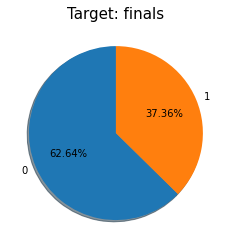

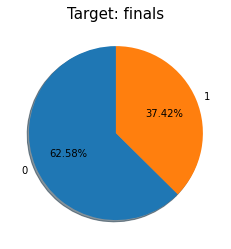

In [1104]:
train_label_count = analysis_on_target(train)
test_label_count = analysis_on_target(test)

In [1124]:
target = 'finals'
features = df.columns.drop([target, 'placement', 'units'])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_true = test[target]

In [1125]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100, random_state=2, oob_score=True)
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증 정확도: ', pipe.score(X_val, y_val))
print('검증 f1: ', f1_score(y_val, y_pred))




검증 정확도:  0.896795672076571
검증 f1:  0.8612199216564074


In [1126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
def fit_trees(X_train, y_train):
    pipe = None    # pipe = make_pipeline(...)
    clf = None     # clf = RandomizedSearchCV(pipe, ...)

    # YOUR CODE HERE

    ## encoder, imputer, 모델을 포함하는 하나의 학습 파이프라인
    pipe = make_pipeline(
        OrdinalEncoder(),
        RandomForestClassifier(random_state=2)
    )

    ## 적어도 두 개 이상의 하이퍼파라미터
    dists = {
        'randomforestclassifier__max_depth': [5,10,15,20,None],
        'randomforestclassifier__max_features' : uniform(0, 1),
        'randomforestclassifier__n_estimators' : randint(50, 500)
    }
    ## RandomizedSearchCV
    clf = RandomizedSearchCV(
        pipe, ## 파이프라인
        param_distributions=dists, ## 탐색할 하이퍼파라미터
        n_iter=2, ## n_iter 10회 이하
        cv=3, ## cv 5 이하
        scoring='f1',
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    ## 훈련데이터로 학습
    clf.fit(X_train, y_train)
    # YOUR CODE ENDS HERE

    return clf

In [1127]:
clf = fit_trees(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [1128]:
print("Best CV F1", clf.best_score_)
print("Best CV params", clf.best_params_)

Best CV F1 0.8602671504303752
Best CV params {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 0.596850157946487, 'randomforestclassifier__n_estimators': 171}


In [1129]:
from sklearn.metrics import classification_report
def predict(X, y, best_estimator):
    y_pred_proba = None

    # YOUR CODE HERE
    y_pred_proba = best_estimator.predict_proba(X)[:,1]
    
    # YOUR CODE ENDS HERE

    report = classification_report(y, y_pred_proba > 0.5)
    return y_pred_proba, report

              precision    recall  f1-score   support

       False       0.90      0.93      0.91      3342
        True       0.87      0.83      0.85      1998

    accuracy                           0.89      5340
   macro avg       0.89      0.88      0.88      5340
weighted avg       0.89      0.89      0.89      5340



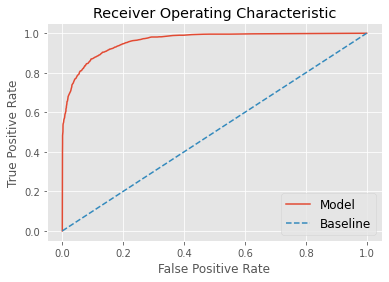

In [1130]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test = y_true
def plot_roc(y, y_pred_proba):
    auc_score = roc_auc_score(y, y_pred_proba)
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    baseline_fpr, baseline_tpr, _ = roc_curve(y, [0] * len(y))

    plt.style.use("ggplot")
    plt.plot(fpr, tpr, label="Model")
    plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
    plt.xlabel("False Positive Rate", size=12)
    plt.ylabel("True Positive Rate", size=12)
    plt.title("Receiver Operating Characteristic")
    plt.legend(prop={"size": 12})
    plt.show()
    return auc_score


y_test_pred_proba, report = predict(X_test, y_test, clf.best_estimator_)
print(report)
auc_score = plot_roc(y_test, y_test_pred_proba)

In [1131]:
print("Test AUC:", auc_score)

Test AUC: 0.9604044499316792


In [1134]:
pipeline = clf.best_estimator_

# TODO: pipeline을 preprocess_pipeline과 model로 나눠 주세요.
preprocess_pipeline = None
model = None
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
encoder = pipeline.named_steps['ordinalencoder']
model = pipeline.named_steps['randomforestclassifier']

pipe = Pipeline([
    ('preprocessing', make_pipeline(encoder)),
    ('rf', model) 
])

preprocess_pipeline = pipe.named_steps['preprocessing']
model = pipe.named_steps['rf']

# YOUR CODE ENDS HERE

# TODO: X_test를 preprocess_pipeline에 통과시켜 X_test_preprocessed를 만드세요.
X_test_preprocessed = None
# YOUR CODE HERE
X_test_preprocessed = preprocess_pipeline.transform(X_test)
# YOUR CODE ENDS HERE

In [1135]:
import eli5
from eli5.sklearn import PermutationImportance


def get_permutation_importance(X, y, model):
    permuter = None
    # permuter = PermutationImportance(..., n_iter=5, random_state=42)

    # YOUR CODE HERE
    permuter = PermutationImportance(
        pipe.named_steps['rf'], # model
        scoring='roc_auc', # metric
        n_iter=5, # 다른 random seed를 사용하여 5번 반복
    )
    
    # YOUR CODE ENDS HERE
    permuter.fit(X, y)

    return permuter

In [1140]:
permuter = get_permutation_importance(X_test_preprocessed, y_test, model)

In [1151]:
zip(X_test.columns, permuter.feature_importances_)

In [1141]:
permuter.feature_importances_

array([ 6.90157542e-04, -1.77466515e-05, -3.45992312e-04,  3.38835245e-03,
        6.24053138e-05,  2.02255128e-01,  4.47188361e-02,  3.58736954e-04,
        4.63569494e-04, -1.02046990e-04,  1.91648860e-04,  9.54913621e-03,
       -5.94400505e-05,  1.01716019e-03])

In [1136]:
permuter = get_permutation_importance(X_test_preprocessed, y_test, model)
eli5.show_weights(permuter, top=None, feature_names=X_test.columns.tolist())
print("Top3 Important Features:")
p_i = sorted(
    list(zip(X_test.columns.tolist(), permuter.feature_importances_)),
    key=lambda x: x[1],
    reverse=True,
)
print(p_i[:3])

Top3 Important Features:


TypeError: ignored

In [ ]:
p_i

In [1146]:
# 테스트셋 예측 결과 계산하는 함수
def calculate_score(pipe, X_test, y_test):
    test_accuracy = pipe.score(X_test, y_test)
    test_f1 = f1_score(y_test, pipe.predict(X_test))
    return test_accuracy, test_f1

In [1147]:
test_accuracy, test_f1 = calculate_score(clf.best_estimator_, X_test, y_test)

In [1148]:
print("test accuracy: ", test_accuracy)
print("test F1:", test_f1)

test accuracy:  0.8911985018726591
test F1: 0.8509874326750448


In [1149]:
from pdpbox.pdp import pdp_isolate, pdp_plot


def get_pdp_isolated(dataset, model, feature):
    pdp_isolated = None

    # YOUR CODE HERE
    pdp_isolated = pdp_isolate(
        model=model, 
        dataset=dataset, 
        model_features=dataset.columns, 
        feature=feature,
        grid_type='percentile', # default='percentile', or 'equal'
        num_grid_points=10 # default=10
    )
    
    # YOUR CODE ENDS HERE

    return pdp_isolated

In [1150]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=X_test.columns)
feature = sorted(p_i, key=lambda x: x[1], reverse=True)[0][0]
pdp_isolated = get_pdp_isolated(X_test_preprocessed_df, model, feature)
pdp_plot(pdp_isolated, feature_name=feature)

NameError: ignored